# Cost

Cost is the average or total of the `loss`

Cost is a function of `weights` and `biases`

Cost is a measurement of how well your `model` predicts

# Linear Regression


## Training One Parameter

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#### Plotting `Data Space` & `Parameter Space`

In [4]:
class plot_diagram():
    
    # Constructor
    def __init__(self, X,Y, w, stop, go=False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start
    
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y, 'ro')
        plt.xlabel("B")
        plt.figure()
        
    # Destructor
    def __del__(self):
        plt.close('all')
        

Now let's make some data

In [15]:
import torch

# create the f(x) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1,1)
f = -3 * X


let's plot the line

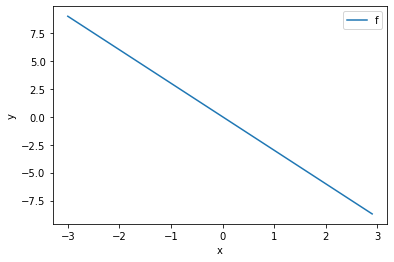

In [16]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

add noise to simulate real data

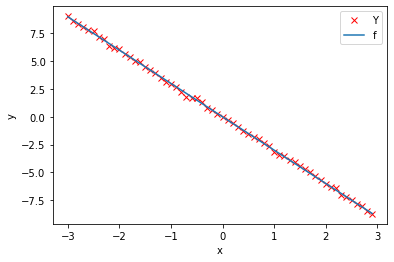

In [17]:
Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'rx', label= 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create the Model and Cost Function (total loss)

#### We will train the model and evaluate the result.

First, let's define the `function` $y = w * x$ ( *notice there is no bias* ) 

In [18]:
# Create forward function for prediction

def forward(x):
    return w * x

Define the cost or *criterion* function using **MSE** ( Mean Square Error )

In [19]:
def criterion(yhat, y):
    return torch.mean((yhat - 2) ** 2)

Set the learning rate to `lr = 0.1` and `LOSS = []` ( *an empty list* ) 

In [20]:
lr = 0.1
LOSS = []

Declare model parameters

In [22]:
w = torch.tensor(-10.0, requires_grad = True)

Create a `plot_diagram` object to visualize the **Data Space** and **Parameter Space** for each iteration during training.

In [25]:
gradient_plot = plot_diagram(X,Y, w, stop=5)

# Train the Model

In [27]:
# define the train function

def train_model(iter):
    for epoch in range(iter):
        
        Yhat = forward(X)
        
        loss = criterion(Yhat, Y)
        
        gradient_plot(Yhat, w, loss.item(), epoch)
        